In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from my_models.optimizer import Optimizer # Кастомный класс оптимизатора
from my_models.normolization import min_max_scaller # Кастоммный класс нормализации

In [3]:
df = pd.read_csv('5.dat', sep='\t')
df

,Tsys,Out1,Ou2,In1,In2,In3,In4,In5,In6
0,2362.42077,7.66364,1.68724,-90.0,5099.35795,4.46604,0.000356,0.001120,0.001120
1,5962.07691,8.39095,1.68731,-90.0,5100.97968,8.07564,0.000427,0.000405,0.000405
2,9561.85409,8.67365,1.68735,-90.0,5102.47173,11.21727,0.000404,-0.000035,-0.000035
3,13161.83265,8.46233,1.68744,-90.0,5103.83133,14.14074,0.000367,0.000555,0.000555
4,16761.45287,9.25582,1.68747,-90.0,5105.14095,17.00533,0.000353,0.001050,0.001050
...,...,...,...,...,...,...,...,...,...
1001,34760.94292,8.52628,1.68773,90.0,5111.62272,31.27375,0.000382,0.000542,0.000542
1002,38360.94078,8.05349,1.68784,90.0,5112.89864,34.08435,0.000358,0.000747,0.000747
1003,41960.78591,7.93733,1.68788,90.0,5114.16861,36.90738,0.000349,0.000990,0.000990
1004,45560.60909,7.94716,1.68786,90.0,5115.43246,39.71580,0.000342,0.001210,0.001210


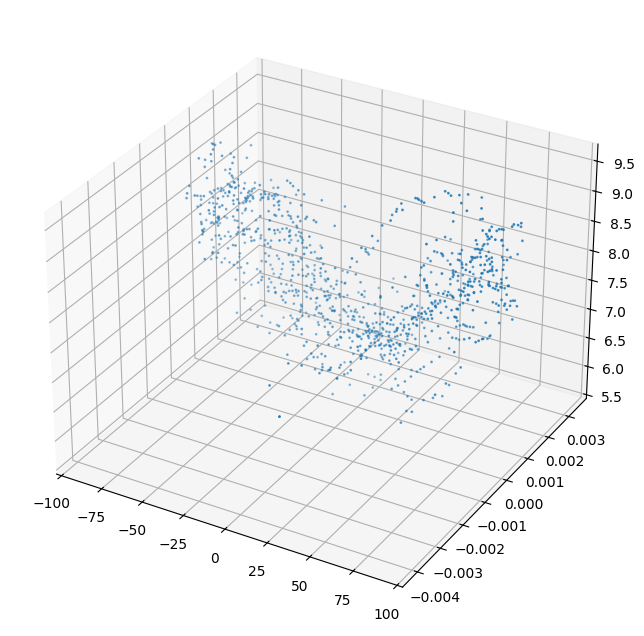

In [4]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['In1'], df['In6'], df['Out1'], s=1)

plt.show()

In [5]:
X = df[['In1', 'In2']].values
y = df['Out1'].values
y = y.reshape(-1, 1)

minMaxScaller = min_max_scaller()
minMaxScaller.fit(X)
X_norm = minMaxScaller.transform(X)
X_norm

array([[0.        , 0.01936935],
       [0.        , 0.10865578],
       [0.        , 0.19080252],
       ...,
       [1.        , 0.8347893 ],
       [1.        , 0.90437218],
       [1.        , 0.97309344]], shape=(1006, 2))

In [6]:
import importlib
import my_models.NeuronNetwork

importlib.reload(my_models.NeuronNetwork)
from my_models.NeuronNetwork import NeuronNetwork

In [7]:
nn = NeuronNetwork(layers=((10, 'ReLU'),
                           (30, 'ReLU'),
                           (25, 'ReLU'),
                           (1, 'lianer')),
                   loss_func='mse')

nn.fit(X_norm, y, size_batch=10, learning_rate=10**(-4), eps=10**(-8), optimizer='Adam', count_epoch=20, count_of_iteration=25000)

Эпоха 1 обучена | LogLoss: [[0.31057471]]
Эпоха 2 обучена | LogLoss: [[0.20678482]]
Модель обновлена
Эпоха 3 обучена | LogLoss: [[0.05350865]]
Модель обновлена
Эпоха 4 обучена | LogLoss: [[0.46565706]]
Эпоха 5 обучена | LogLoss: [[0.60149174]]
Эпоха 6 обучена | LogLoss: [[0.27125024]]
Эпоха 7 обучена | LogLoss: [[0.39335102]]
Эпоха 8 обучена | LogLoss: [[0.20431738]]
Эпоха 9 обучена | LogLoss: [[0.18989687]]
Эпоха 10 обучена | LogLoss: [[0.63458588]]
Эпоха 11 обучена | LogLoss: [[0.14775157]]
Эпоха 12 обучена | LogLoss: [[0.21190268]]
Эпоха 13 обучена | LogLoss: [[0.34171018]]
Эпоха 14 обучена | LogLoss: [[0.42763895]]
Эпоха 15 обучена | LogLoss: [[0.77277562]]
Эпоха 16 обучена | LogLoss: [[0.29840308]]
Эпоха 17 обучена | LogLoss: [[0.12341342]]
Эпоха 18 обучена | LogLoss: [[0.12901371]]
Эпоха 19 обучена | LogLoss: [[0.44585577]]
Эпоха 20 обучена | LogLoss: [[0.25454431]]


In [8]:

n = 3000
x = np.linspace(df['In1'].min(), df['In1'].max(), n)
y = np.linspace(df['In2'].min(), df['In2'].max(), n)
X, Y = np.meshgrid(x, y)
X_test = np.column_stack((X.ravel(), Y.ravel()))
X_norm_test = minMaxScaller.transform(X_test)
X_norm_test
Y_test = nn.predict(X_norm_test)
Y_test[:,0]

array([8.74961987, 8.74818735, 8.74675483, ..., 8.02731606, 8.02915912,
       8.03100219], shape=(9000000,))

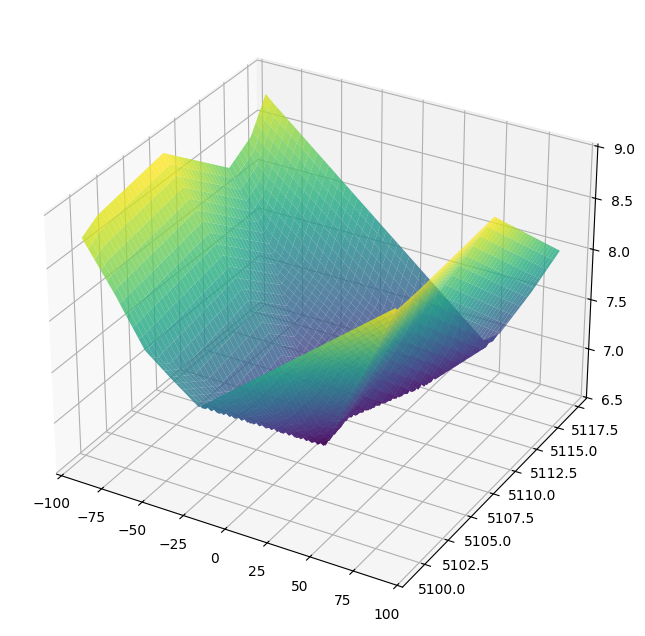

In [9]:
X = X_test[:, 0].reshape(n, n)
Y = X_test[:, 1].reshape(n, n)
Z = Y_test[:, 0].reshape(n, n)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis')

plt.show()